In [7]:
import pandas as pd
from backtest import backtest_dca

import config as cfg

In [8]:
!python load_data.py

Loading data for ['SPY', 'ASML.AS'] from 2024-02-07 to 2026-02-07...
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Loading data for {'BTC': 'BTC-USD', 'ETH': 'ETH-USD', 'BNB': 'BNB-USD', 'XRP': 'XRP-USD', 'SOL': 'SOL-USD', 'TRON': 'TRX-USD', 'ADA': 'ADA-USD', 'XMR': 'XMR-USD', 'LINK': 'LINK-USD', 'AVAX': 'AVAX-USD'} from 2024-02-07 to 2026-02-07...
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[****

# crypto

In [9]:
df_crypto = pd.read_csv("data/crypto.csv", index_col=0, parse_dates=True)
df_crypto = df_crypto.dropna()
df_crypto

,BTC,ETH,BNB,XRP,SOL,TRON,ADA,XMR,LINK,AVAX
Date,,,,,,,,,,
2024-02-07,44318.222656,2423.745117,307.634583,0.513789,100.979279,0.123515,0.501773,129.953049,18.854925,35.279247
2024-02-08,45301.566406,2419.906494,318.871887,0.514529,102.785637,0.121924,0.529269,127.912910,18.231304,35.427765
2024-02-09,47147.199219,2487.515625,323.842285,0.526031,106.933334,0.123776,0.540792,121.915337,18.467882,38.010960
2024-02-10,47771.277344,2501.228271,323.133881,0.524112,109.131470,0.124410,0.551412,119.205864,19.091101,40.288319
2024-02-11,48293.917969,2507.570557,320.787537,0.526084,107.495285,0.124278,0.541410,120.610199,20.128960,39.732269
...,...,...,...,...,...,...,...,...,...,...
2026-02-02,78688.765625,2344.356689,774.579285,1.620547,104.471153,0.283123,0.298900,386.892914,9.806777,10.142554
2026-02-03,75633.546875,2227.558838,753.578186,1.574199,97.563904,0.285627,0.290788,374.591797,9.450989,9.895763
2026-02-04,73019.703125,2143.504150,697.861755,1.510476,92.029305,0.282773,0.286301,382.406860,9.251476,9.711348


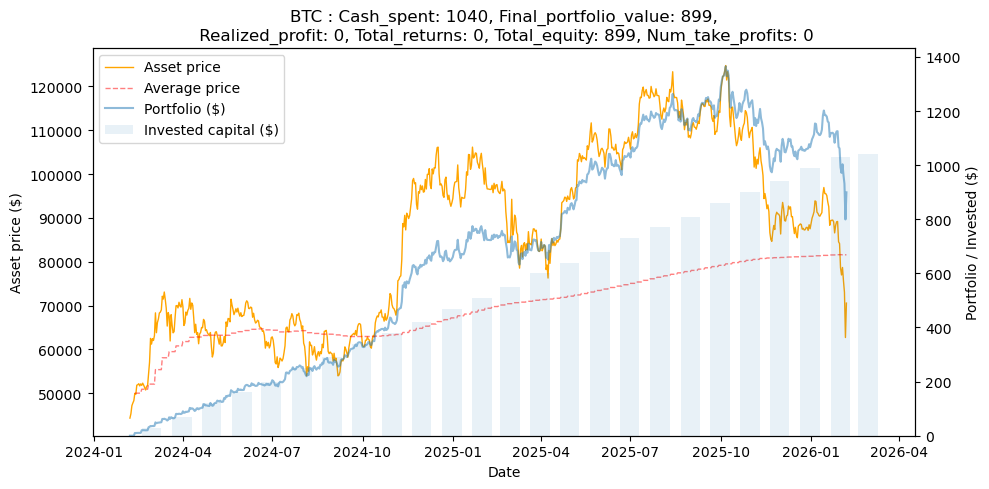

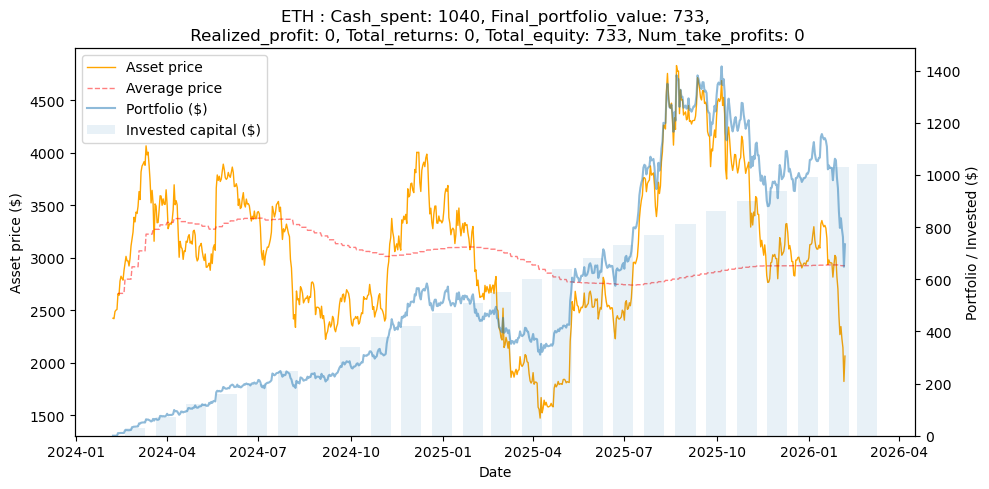

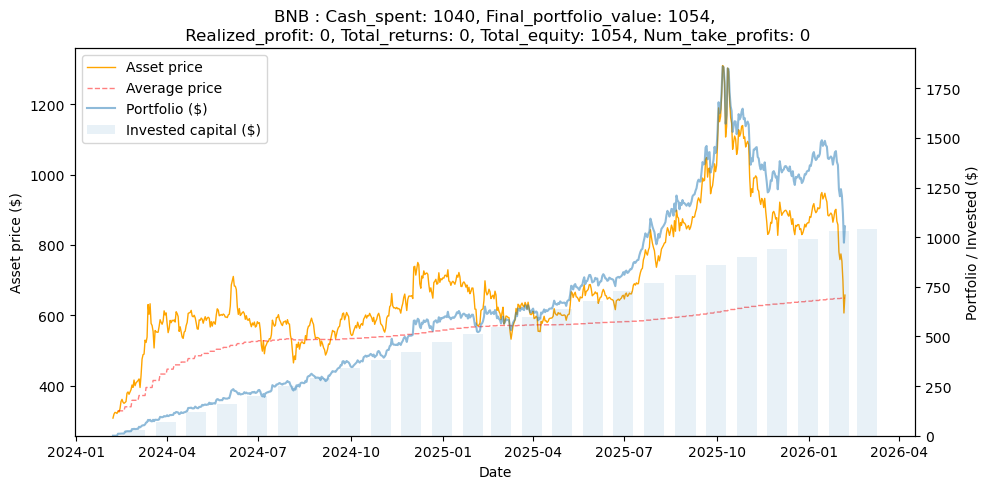

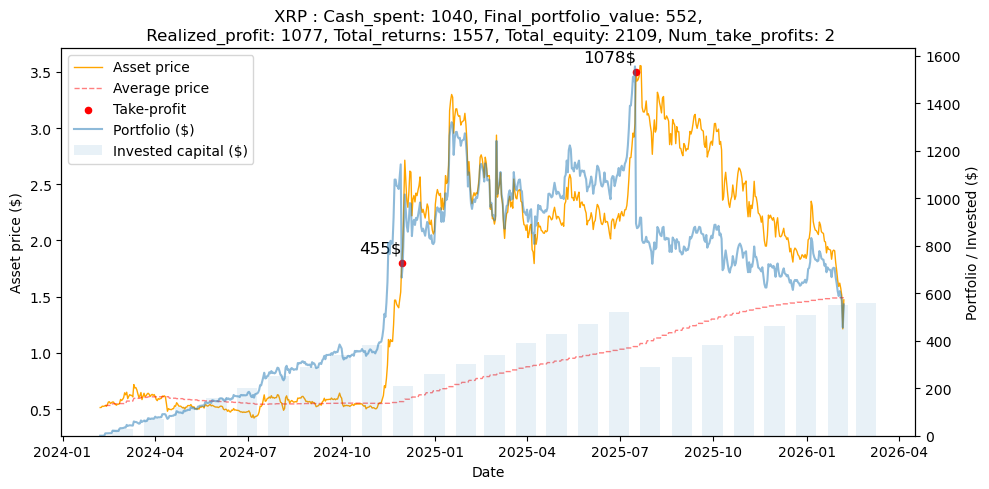

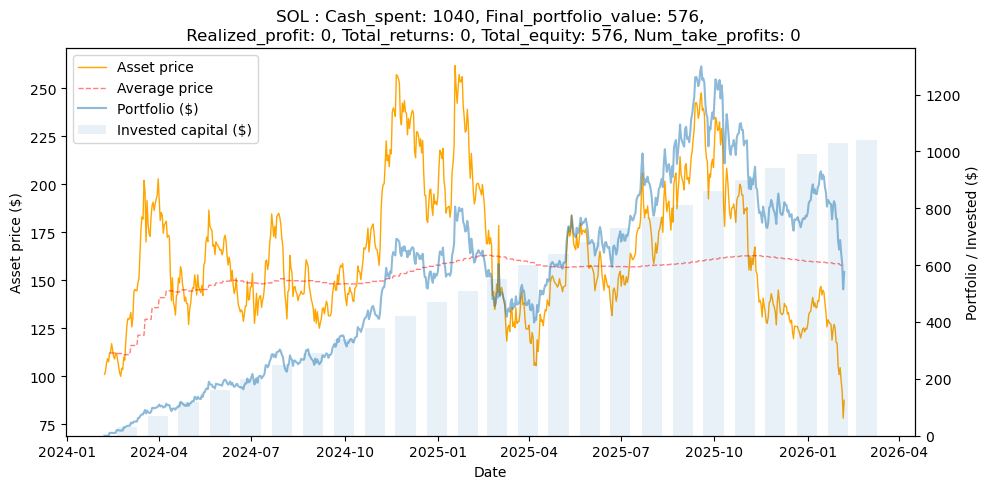

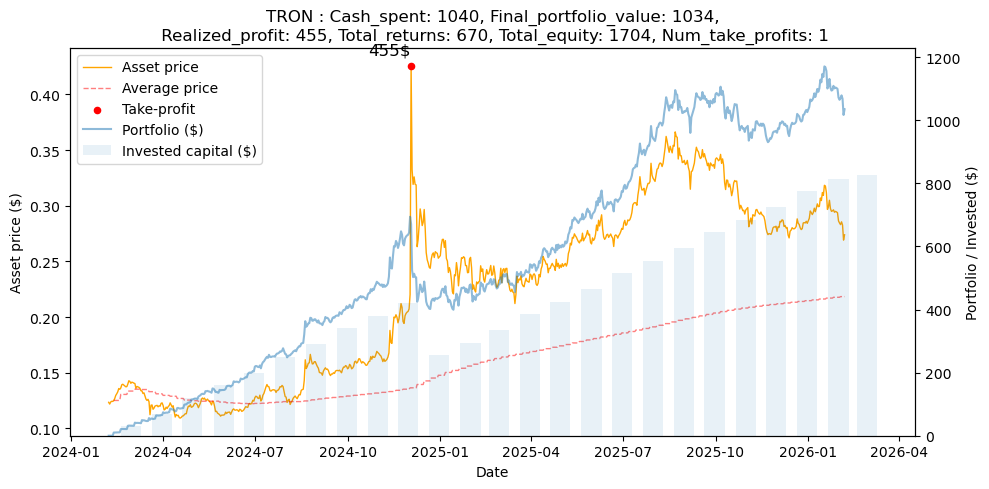

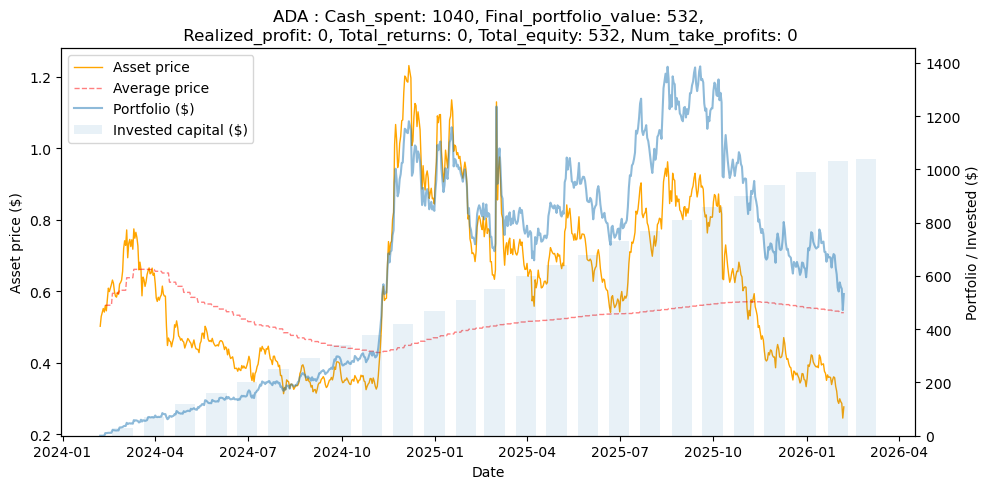

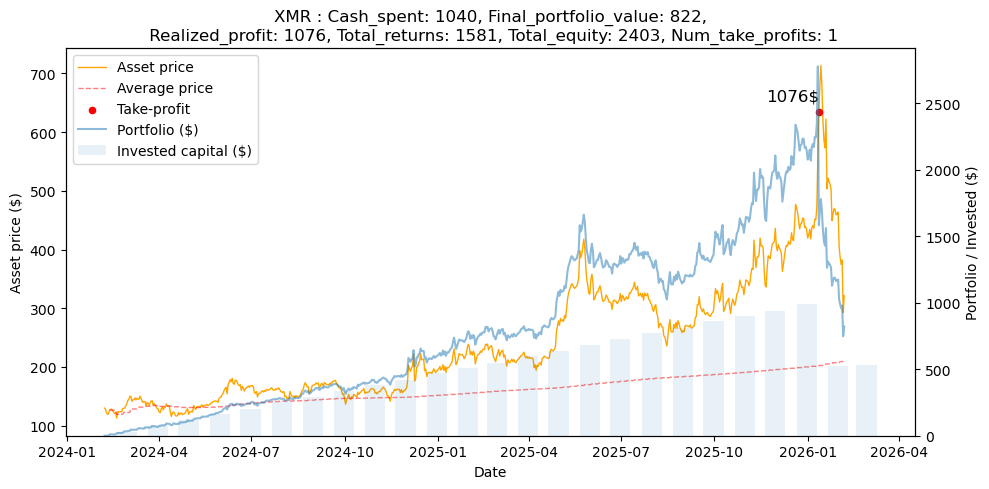

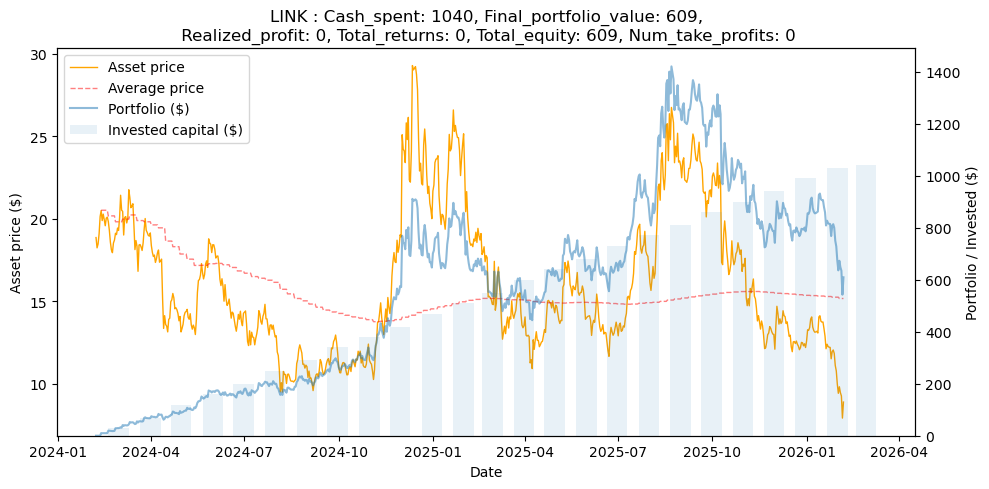

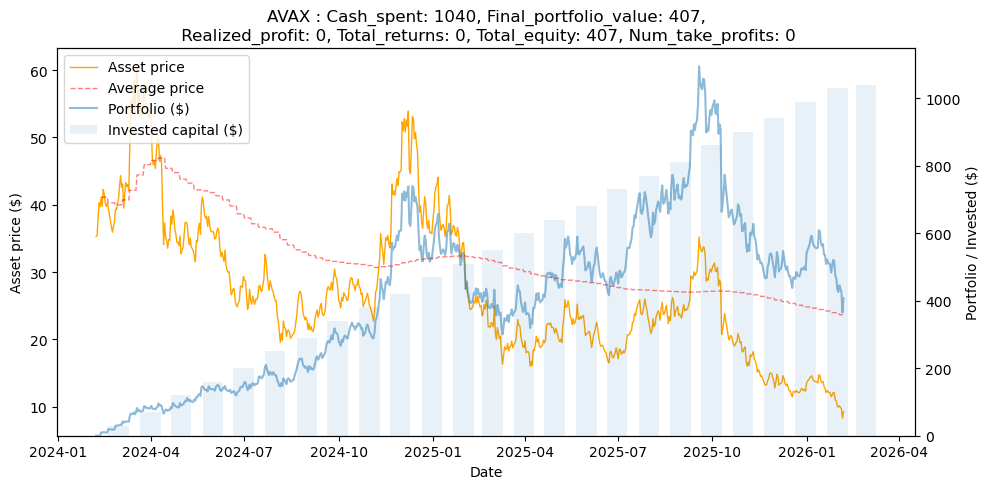

In [10]:
for token in df_crypto.columns:
    token_prices = df_crypto[token]

    backtest_dca(
        target=token,
        prices=token_prices,
        buy_amount=cfg.crypto_regular_amount,
        freq=cfg.crypto_freq,
        fee=cfg.crypto_fee,
        profit_multiple=cfg.crypto_profit_multiple,
        cooldown_days=180,
        plot=True
    )

# stocks

In [11]:
df_stocks = pd.read_csv("data/stocks.csv", index_col=0, parse_dates=True)
df_stocks = df_stocks.dropna()
df_stocks

,SPY,ASML.AS
Date,,
2024-02-07,498.100006,850.000000
2024-02-08,498.320007,855.099976
2024-02-09,501.200012,876.099976
2024-02-12,500.980011,877.599976
2024-02-13,494.079987,850.700012
...,...,...
2026-02-02,695.409973,1224.800049
2026-02-03,689.530029,1190.400024
2026-02-04,686.190002,1140.599976


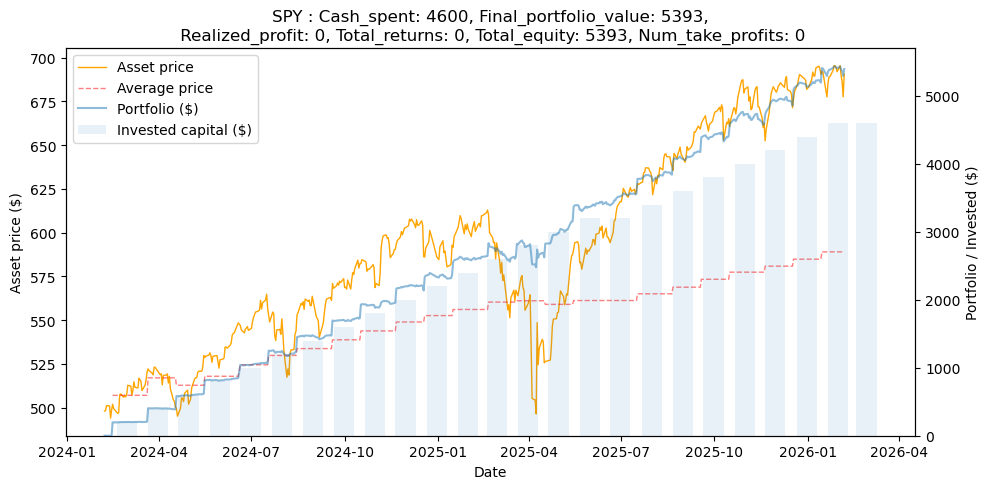

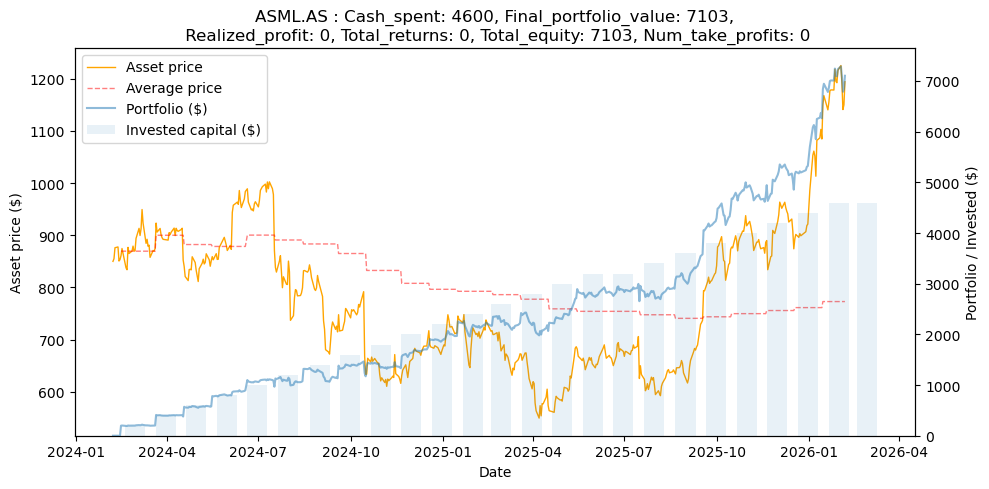

In [12]:
for stock in df_stocks.columns:
    stock_prices = df_stocks[stock]

    backtest_dca(
        target=stock,
        prices=stock_prices,
        buy_amount=cfg.stock_regular_amount,
        freq=cfg.stock_freq,
        fee=cfg.stock_fee,
        profit_multiple=cfg.stock_profit_multiple,
        cooldown_days=180,
        plot=True
    )